In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-family: 'Consolas';
font-size: 12px;
</style>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model


In [40]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

In [41]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [42]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [43]:
K = len(set(y_train.flatten()))
print(K)


10


In [44]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)


In [45]:
model = Model(i,x)

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5270 - accuracy: 0.8064 - val_loss: 0.4729 - val_accuracy: 0.8321
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3607 - accuracy: 0.8661 - val_loss: 0.3489 - val_accuracy: 0.8678
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3097 - accuracy: 0.8845 - val_loss: 0.3288 - val_accuracy: 0.8790
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2768 - accuracy: 0.8963 - val_loss: 0.2996 - val_accuracy: 0.8937
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2503 - accuracy: 0.9061 - val_loss: 0.2944 - val_accuracy: 0.8943
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2303 - accuracy: 0.9132 - val_loss: 0.2880 - val_accuracy: 0.8981
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2124 - accuracy: 0.9197 - val_loss: 0.3006 - val_accuracy:

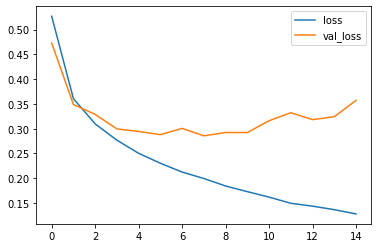

In [49]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

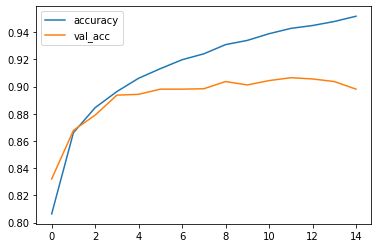

In [50]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()